In [1]:
import pandas as pd
import numpy as np
import string
import nltk

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [2]:
tmp = pd.read_csv('/Users/syan/DataScience/test_codes/NLP/interview_dataset.csv', 
                  sep=',', error_bad_lines=False)

Skipping line 44: expected 4 fields, saw 8
Skipping line 45: expected 4 fields, saw 5
Skipping line 18798: expected 4 fields, saw 7
Skipping line 32145: expected 4 fields, saw 5
Skipping line 38888: expected 4 fields, saw 21
Skipping line 43707: expected 4 fields, saw 9
Skipping line 59495: expected 4 fields, saw 18
Skipping line 71979: expected 4 fields, saw 6
Skipping line 75651: expected 4 fields, saw 6
Skipping line 75864: expected 4 fields, saw 5
Skipping line 76298: expected 4 fields, saw 11
Skipping line 77021: expected 4 fields, saw 5
Skipping line 88982: expected 4 fields, saw 9
Skipping line 95139: expected 4 fields, saw 5
Skipping line 96523: expected 4 fields, saw 5
Skipping line 99169: expected 4 fields, saw 5
Skipping line 100664: expected 4 fields, saw 6
Skipping line 102151: expected 4 fields, saw 5
Skipping line 104137: expected 4 fields, saw 5
Skipping line 105744: expected 4 fields, saw 5
Skipping line 109188: expected 4 fields, saw 8

Skipping line 132555: expected 

In [3]:
tmp.shape

(171211, 4)

In [4]:
tmp.title.nunique()

96668

In [5]:
tmp.dropna(inplace=True)

### Cleasing data

In [6]:
tmp['title'] = tmp['title'].apply(lambda x: str(x).lower())

In [7]:
tmp['title'] = tmp['title'].apply(lambda x: str(x).translate(string.maketrans("",""), string.punctuation))

** n-grams **

In [34]:
cv = CountVectorizer(ngram_range=(2,2), max_df=0.8, min_df=2, 
                     stop_words=nltk.corpus.stopwords.words('english'), 
                     token_pattern=u'(?u)\\b\\w\\w+\\b')
fitted_df = cv.fit_transform(tmp['title'])

In [35]:
token_name = cv.get_feature_names()

In [36]:
token_count = fitted_df.sum(axis=0)

In [37]:
len(token_name)

23240

In [38]:
np.asarray(token_count.T)[:,0].shape

(23240,)

In [39]:
new_df = pd.DataFrame(token_count.T, index=token_name, columns=['Count'])

In [40]:
new_df.sort_values('Count', ascending=False)[0:20]

,Count
customer service,2441
project manager,1551
sales associate,1264
software engineer,1192
service representative,1032
sales manager,1031
administrative assistant,1015
account manager,975
vice president,940
assistant manager,889


### Visualization

In [41]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn

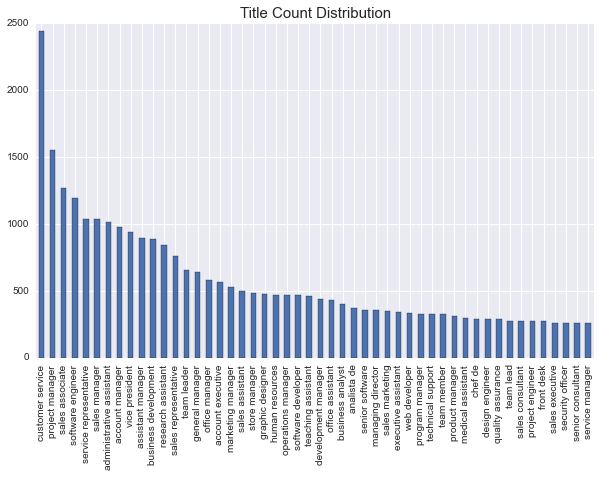

In [42]:
plt.figure(figsize=(10,6))
new_df.sort_values('Count', ascending=False)['Count'].head(50).plot(kind='bar')
plt.title('Title Count Distribution', fontsize=15)